# Species Accumulation Curves
Point count data is analysed using species accumulation curve modelling to determine how close observed species numbers are to actual numbers present in the site. In this model, the expected cumulative number of species is given by

$
\begin{equation}
S(t) = \frac{a}{b}\{1 - \exp{(-bt)}\}
\end{equation}
$

where $t$ is a unit of effort (point count number in this case). $a$ is a parameter that measures the rate of species increase at the begining of the study and $\frac{a}{b}$ is the asymptote. We compute the number of point counts required to reach $90\%$ survey completeness as

$
\begin{equation}
    t_{0.9}=-\frac{1}{b}\ln{(1-0.9)}.
\end{equation}
$

The species accumulation curves for MKNP and DeKUWC are shown in Figure 5 and 6 of the paper respectively.

In [1]:
import os
import random
import numpy as np
import pandas as pd
import scipy 

from scipy import stats

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# MKNP

In [2]:
# MKNP
mknp_pc = pd.read_csv('../annotations/mknp-pc-2017-2018.csv')

In [3]:
mknp_pc_species = list(mknp_pc['Unnamed: 0'])

In [4]:
len(mknp_pc_species)

48

In [5]:
cumm_species = []
cumm_species_num = []
for pc_date in mknp_pc.keys()[1:]:
    pc_species_seen = [sp for indx, sp in enumerate(mknp_pc_species) if mknp_pc[pc_date][indx]]
    cumm_species += pc_species_seen
    cumm_species_num.append(len(set(cumm_species)))

(0.0, 50.0)

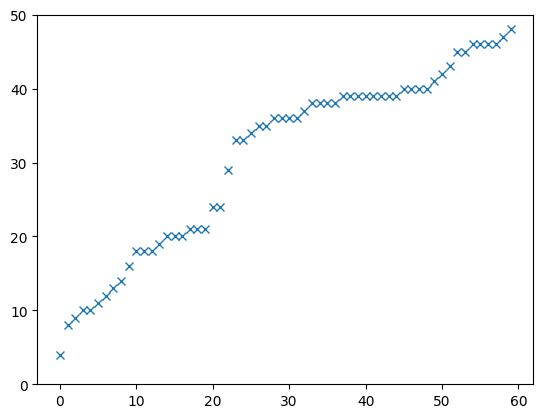

In [6]:
plt.plot(cumm_species_num, 'x')
plt.ylim([0, 50])

In [7]:
# Curve equation
def func(t, a, b):
    return (a / b) * (1 - np.exp(-b * t))


In [8]:
x = np.arange(1, len(cumm_species_num) + 1)
y = np.array(cumm_species_num)

In [9]:
popt, pcov = curve_fit(func, x, y)
t_q = -(1/popt[1]) * np.log(0.1)
asym = popt[0]/popt[1]

/tmp/ipykernel_265794/263887346.py:3: RuntimeWarning: overflow encountered in exp
  return (a / b) * (1 - np.exp(-b * t))


## Asymptote and $t_{0.9}$

In [10]:
t_q, asym

(67.0950018403592, 52.51086968276234)

In [11]:
x_pred = np.linspace(0, 100, 1000)
y_pred = func(x_pred, popt[0], popt[1])

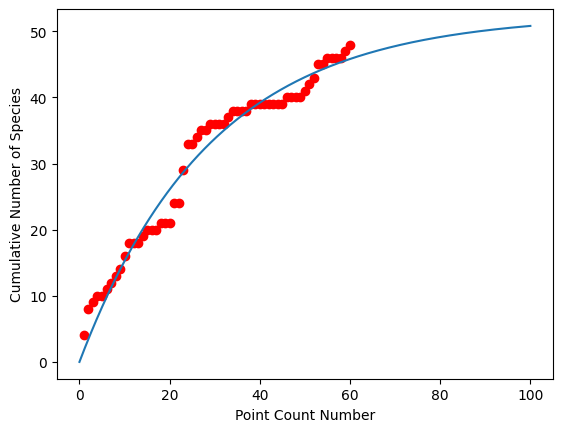

In [12]:
plt.plot(x, y, 'ro')
plt.plot(x_pred, y_pred)
plt.xlabel('Point Count Number')
plt.ylabel('Cumulative Number of Species')
plt.savefig('mknp-pc-acc.jpg', dpi=300)

# DeKUWC

In [13]:
dekut_pc = pd.read_csv('../annotations/dekuwc-pc-2017.csv')
dekut_pc_species = list(dekut_pc['Unnamed: 0'])

len(dekut_pc_species)

57

In [14]:
cumm_species = []
cumm_species_num = []
for pc_date in dekut_pc.keys()[1:]:
    pc_species_seen = [sp for indx, sp in enumerate(dekut_pc_species) if dekut_pc[pc_date][indx]]
    cumm_species += pc_species_seen
    cumm_species_num.append(len(set(cumm_species)))

In [15]:
x = np.arange(1, len(cumm_species_num) + 1)
y = np.array(cumm_species_num)

## Asymptote and $t_{0.9}$

In [16]:
popt, pcov = curve_fit(func, x, y)
t_q = -(1/popt[1]) * np.log(0.1)
asym = popt[0]/popt[1]

t_q, asym

/tmp/ipykernel_265794/263887346.py:3: RuntimeWarning: overflow encountered in exp
  return (a / b) * (1 - np.exp(-b * t))


(34.08012460872543, 58.68384580594864)

In [17]:
x_pred = np.linspace(0, 100, 1000)
y_pred = func(x_pred, popt[0], popt[1])

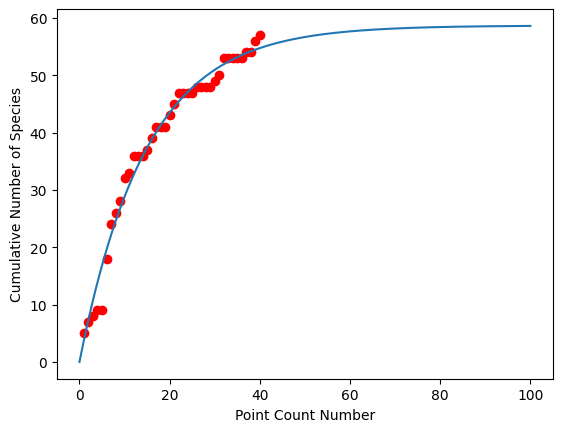

In [18]:
plt.plot(x, y, 'ro')
plt.plot(x_pred, y_pred)
plt.xlabel('Point Count Number')
plt.ylabel('Cumulative Number of Species')
plt.savefig('dekuwc-pc-acc.jpg', dpi=300)